In [1]:
import geemap
import ee
ee.Initialize()

In [2]:
Map = geemap.Map(center = [-7.7902,110.3846],zoom=12)

In [3]:
import numpy as np
x = np.genfromtxt("Longitude.txt")
y = np.genfromtxt("Latitude.txt")
Listarea = []
for a,b in zip(x,y):
    Listarea.append([a,b])
delta = ee.Geometry.Polygon(
    [Listarea], None, False)

Map.addLayer(delta,{}, "Area DIY")

In [4]:
image2019   = ee.Image("COPERNICUS/Landcover/100m/Proba-V-C3/Global/2019").select('discrete_classification').clip(delta)
image2018   = ee.Image("COPERNICUS/Landcover/100m/Proba-V-C3/Global/2018").select('discrete_classification').clip(delta)
image2015   = ee.Image("COPERNICUS/Landcover/100m/Proba-V-C3/Global/2015").select('discrete_classification').clip(delta)
Map.addLayer(image2019, {}, "2019")
Map.addLayer(image2018, {}, "2018")
Map.addLayer(image2015, {}, "2015")

In [5]:
ee_class_table = '''
Value	Color	Description
0	282828	Unknown
20	FFBB22	Shrubs
30	FFFF4C	Herbaceous vegetation
40	F096FF	Cultivated and managed vegetation / agriculture
50	FA0000	Urban / built up
60	B4B4B4	Bare / sparse vegetation
70	F0F0F0	Snow and ice
80	0032C8	Permanent water bodies
90	0096A0	Herbaceous wetland
100	FAE6A0	Moss and lichen.
111	58481F	Closed forest, evergreen needle leaf
112	009900	Closed forest, evergreen broad leaf
113	70663E	Closed forest, deciduous needle leaf
114	00CC00	Closed forest, deciduous broad leaf
115	4E751F	Closed forest, mixed
116	007800	Closed forest, not matching any of the other definitions
121	666000	Open forest, evergreen needle leaf
122	8DB400	Open forest, evergreen broad leaf
123	8D7400	Open forest, deciduous needle leaf
124	A0DC00	Open forest, deciduous broad leaf
125	929900	Open forest, mixed
126	648C00	Open forest, not matching any of the other definitions
200	000080	Oceans, seas
'''


legend_dict = geemap.legend_from_ee(ee_class_table)
Map.add_legend(legend_title="Copernicus Global Land Cover", legend_dict=legend_dict,position='bottomright',**{'scale':[10,5]})

# Deskripsi Program

Mengklasifikasikan area di Yogyakarta berdasarkan citra Satelit untuk menjelaskan pentingnya eksistensi Kampung Satwa

## Target Luaran
Pengetahuan, teknologi dan seni baru

## Point program KKN Pendulan

**(10)** Menambahkan informasi guna meningkatkan kesadaran masyarakat mengenai kondisi lingkungan saat ini dan pentingnya menjaga kelestarian alam. <br>
**(22)** optimalisasi media untuk memudahkan sosialisasi dan edukasi dari tim KKN Dusun Pendulan kepada masyarakat


# Visualisasi

In [6]:
Map

Map(center=[-7.7902, 110.3846], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

# Membuat Colorbar Baru

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

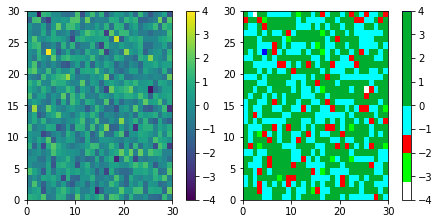

In [8]:
viridis = cm.get_cmap('viridis', 200)
newcolors = viridis(np.linspace(0, 1, 200))
red = np.array([255/255, 0/255, 0/255, 1])
green = np.array([0, 255/255, 0/255, 1])
blue = np.array([0, 0, 255/255, 1])
cyan = np.array([0, 255/255, 255/255, 1])
lgreen = np.array([0, 173/255, 47/255, 1])
white = np.array([255/255, 255/255, 255/255, 1])
newcolors[0:19, :] = white
newcolors[19:49, :] = green
newcolors[49:69, :] = red
newcolors[69:99, :] = cyan
newcolors[99:199, :] = lgreen
newcolors[199,:] = blue 
newcmp = ListedColormap(newcolors)
def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([viridis, newcmp])

# Matplotlib

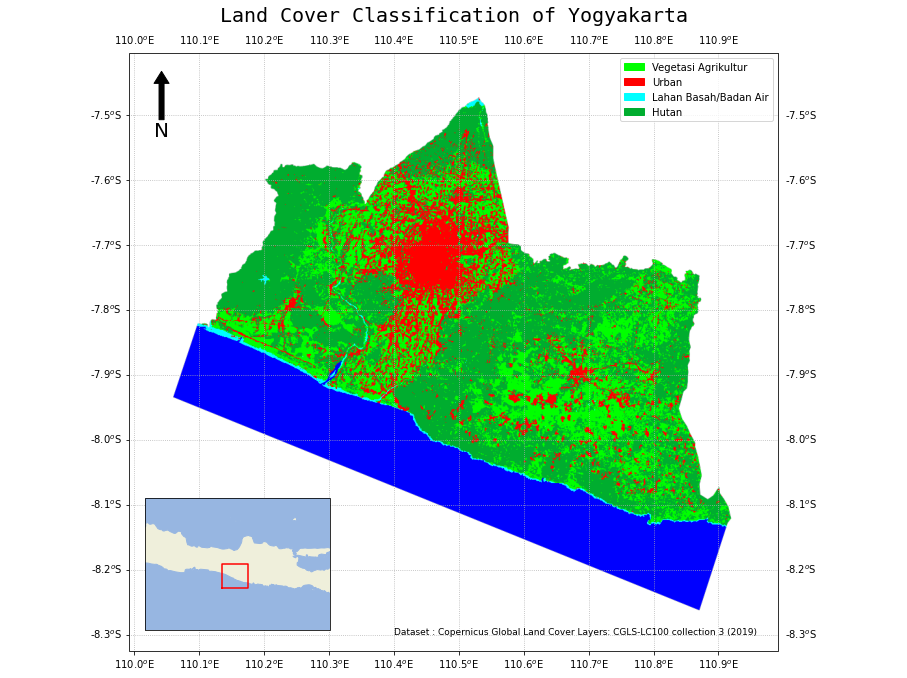

In [34]:
from shapely.geometry import Polygon, MultiLineString
import ee
import geemap
ee.Initialize()
import matplotlib.pyplot as plt
from geemap import cartoee
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,LatitudeLocator)
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches

x = np.genfromtxt("Longitude.txt")
y = np.genfromtxt("Latitude.txt")
Listarea = []
for a,b in zip(x,y):
    Listarea.append([a,b])
delta = ee.Geometry.Polygon(
    [Listarea], None, False)

image2019   = ee.Image("COPERNICUS/Landcover/100m/Proba-V-C3/Global/2019").select('discrete_classification').clip(delta)

viridis = cm.get_cmap('viridis', 200)
newcolors = viridis(np.linspace(0, 1, 200))
red = np.array([255/255, 0/255, 0/255, 1])
green = np.array([0, 255/255, 0/255, 1])
blue = np.array([0, 0, 255/255, 1])
cyan = np.array([0, 255/255, 255/255, 1])
lgreen = np.array([0, 173/255, 47/255, 1])
white = np.array([255/255, 255/255, 255/255, 1])
newcolors[0:19, :] = white
newcolors[19:49, :] = green
newcolors[49:69, :] = red
newcolors[69:99, :] = cyan
newcolors[99:199, :] = lgreen
newcolors[199,:] = blue 
newcmp = ListedColormap(newcolors)

batas =   [110.908074, -7.474152, 109.908074, -8.395494]

fig,ax = plt.subplots(figsize=(16, 11),facecolor='w')
cmap = newcmp
nighttimeVis = {'min':0,'max':200}
ax = cartoee.get_map(image2019, region=batas, vis_params=nighttimeVis,cmap=cmap)
cartoee.add_gridlines(ax, interval=[0.1,0.1], linestyle=":",)

xlab = [str(np.round(item,1))+'$^o$E' for item in ax.get_xticks()];xlab.reverse()
ax.set_xticklabels(xlab)
ylab = [str(np.round(item,1))+'$^o$S' for item in ax.get_yticks()];ylab.reverse()
ax.set_yticklabels(ylab)
ax.tick_params(labeltop=True, labelright=True)

ax.set_title('Land Cover Classification of Yogyakarta',**{'size':20,'family':'monospace'},pad=12)
cartoee.add_north_arrow(ax, xy = (0.05, 0.97))

simbol = [green, red, cyan, lgreen]
simbol_mat = []
teks   = ['Vegetasi Agrikultur', 'Urban','Lahan Basah/Badan Air','Hutan']
for i in simbol:
    simbol_mat.append(mpatches.Patch(color=i))
ax.legend(simbol_mat, teks)
left = 0.245
bottom = 0
width = 0.16
height = 0.47
rect = [left,bottom,width,height]
ax2 = plt.axes(rect, projection=ccrs.PlateCarree())
ax2.set_extent((107,114, -10,-5))
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
lon0,lon1,lat0,lat1 = ax.get_extent()
box_x = [lon0, lon1, lon1, lon0, lon0]
box_y = [lat0, lat0, lat1, lat1, lat0]
ax2.plot(box_x, box_y, color='red',  transform=ccrs.Geodetic())
ax.text(110.5,-7.5,'Dataset : Copernicus Global Land Cover Layers: CGLS-LC100 collection 3 (2019) ', fontsize=9)
fig.axes[0].spines[:].set_visible(False)
fig.axes[0].set_xticks([])
fig.axes[0].set_yticks([])
plt.show()

In [10]:
#fig.savefig('Citra Satelit Lahan.png')

In [32]:
fig.axes[0].spines